# Objective

* Overview of ML Model Build Process
* Logistic Regression Introduction
* Model Evaluations

In [1]:
from __future__ import print_function  # Python 2/3 compatibility

from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

/Users/sampathweb/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Model Building Process

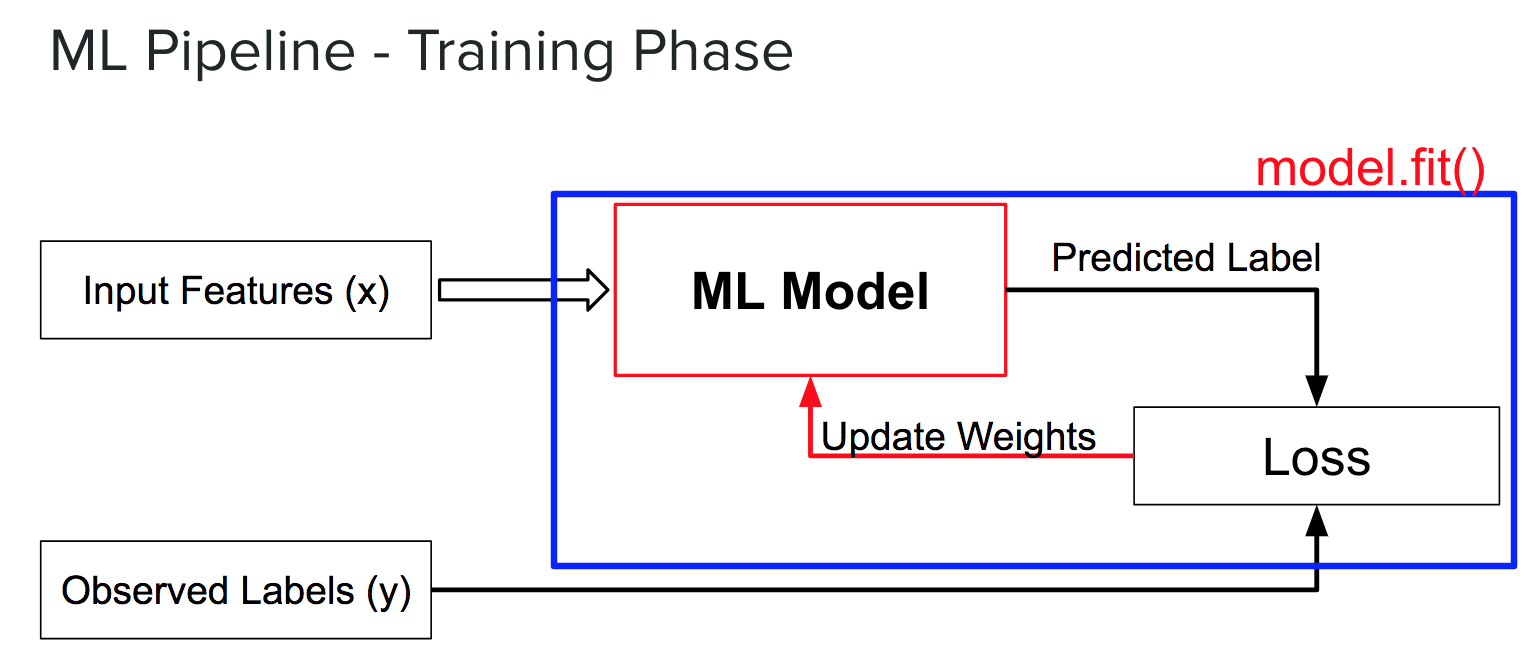

In [2]:
Image("images/model-pipeline.png")

## Dataset

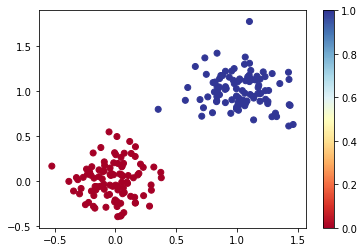

In [3]:
centers = np.array([[0, 0]] * 100 + [[1, 1]] * 100)
np.random.seed(42)
X = np.random.normal(0, 0.2, (200, 2)) + centers
y = np.array([0] * 100 + [1] * 100)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.colorbar();

In [4]:
X[:5]

array([[ 0.09934283, -0.02765286],
       [ 0.12953771,  0.30460597],
       [-0.04683067, -0.04682739],
       [ 0.31584256,  0.15348695],
       [-0.09389488,  0.10851201]])

In [5]:
y[:5], y[-5:]

(array([0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1]))

### Logistic Regression - Model

Take a weighted sum of the features and add a bias term to get the logit.
Sqash this weighted sum to arange between 0-1 via a Sigmoid function.

* Sigmoid Function

<img src="images/sigmoid.png",width=500>


$$f(x) = \frac{e^x}{1+e^x}$$

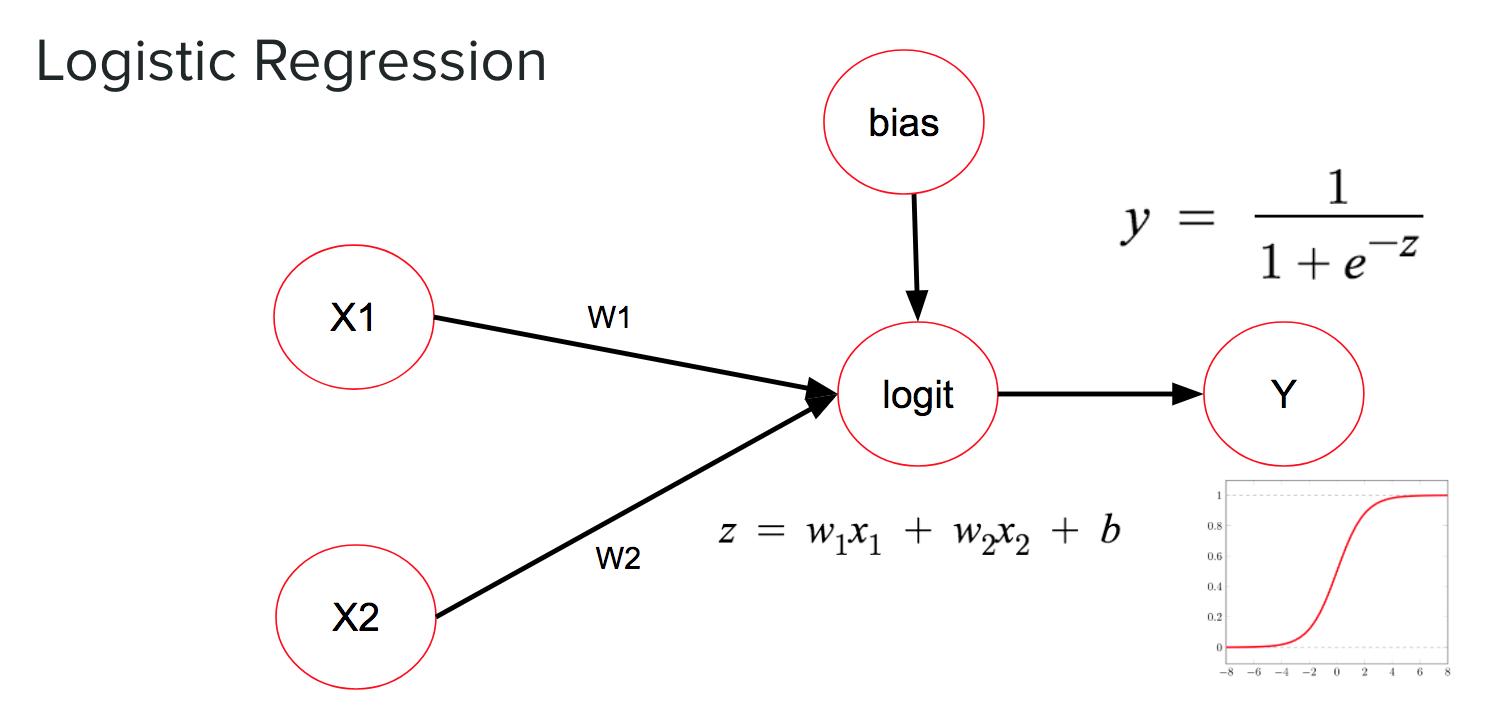

In [6]:
Image("images/logistic-regression.png")

In [7]:
## Build the Model

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
## Step 1 - Instantiate the Model with Hyper Parameters (We don't have any here)
model = LogisticRegression()

In [10]:
## Step 2 - Fit the Model
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
## Step 3 - Evaluate the Model
model.score(X, y)

1.0

In [12]:
def plot_decision_boundaries(model, X, y):
    pred_labels = model.predict(X)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu,
                vmin=0.0, vmax=1)
    xx = np.linspace(-1, 2, 100)

    w0, w1 = model.coef_[0]
    bias = model.intercept_
    yy = -w0 / w1 * xx - bias / w1
    plt.plot(xx, yy, 'k')
    plt.axis((-1,2,-1,2))
    plt.colorbar()

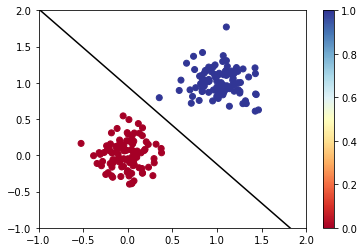

In [13]:
plot_decision_boundaries(model, X, y)

## Dataset - Take 2

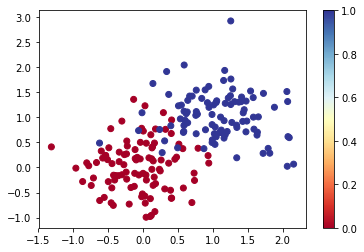

In [14]:
centers = np.array([[0, 0]] * 100 + [[1, 1]] * 100)
np.random.seed(42)
X = np.random.normal(0, 0.5, (200, 2)) + centers
y = np.array([0] * 100 + [1] * 100)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.colorbar();

In [15]:
# Instantiate, Fit, Evalaute
model = LogisticRegression()
model.fit(X, y)
print(model.score(X, y))

0.92


In [16]:
y_pred = model.predict(X)

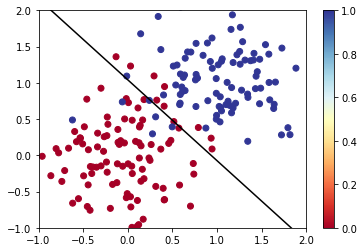

In [17]:
plot_decision_boundaries(model, X, y)

### Other Evaluation Methods

* Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y, y_pred)
cm

array([[90, 10],
       [ 6, 94]])

In [20]:
pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,90,10,100
1,6,94,100
All,96,104,200
